# Vertical infltration for a linear soil 
## M. Vanclooster  06/03/18

In this $Python$ notenook, we evalaute the analytical solution for the vertical infiltration as modelled with the linearised Fokker-Planck diffusion equation, subjected to a Dirichlet boundary condition. For this case the flow equation yields:

\begin{equation}
    \frac{\partial \theta}{\partial t}=D^*\frac{\partial^{2} \theta}{\partial z^2}-k^*\frac{\partial \theta}{\partial z}
\end{equation}

We consider the following boundary conditions:

\begin{equation}
    \theta(0,t)=\theta_s
\end{equation}

\begin{equation}
    \frac{\partial \theta}{\partial z}_{z \rightarrow \infty} =0
\end{equation}

and the following initial condition:
\begin{equation}
    \theta(z\neq 0,0) =0
\end{equation}

The solution of this equations is as follows:
\begin{equation}
    \theta(z,t)=\theta_r + (\theta_s-\theta_r) \frac{1}{2} \left( erfc\left(\frac{z-k^*t}{2\sqrt{D^*t}}\right)+exp\left(\frac{k^*z}{D^*}\right)erfc\left(\frac{z+k^*t}{2\sqrt{D^*t}}\right)\right)
\end{equation}

We'll define a linear soil hydraulic model as follows:
\begin{equation}
    \theta(h)=\theta_s exp(\alpha h)
\end{equation}

and

\begin{equation}
    k(h)=k_s exp(\alpha h)
\end{equation}

which leads to 
\begin{equation}
    C(h)=\alpha \theta_s exp(\alpha h)
\end{equation}

and hence

\begin{equation}
    D^*=\frac{ks}{\alpha \theta_s}
\end{equation}

Let's illustrate this for a given soil

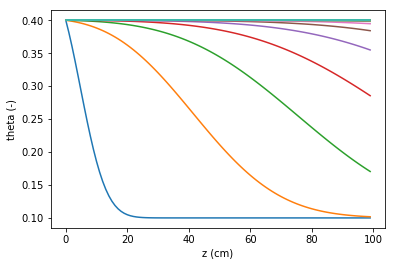

In [44]:
# Miscellaneous operating system interfaces
import os
# Python Numerical computating library
import numpy as np
# Python Scientifical computing library
import scipy as sc
# Python plotting library
from matplotlib import pyplot as plt
# Allowing plot inside the notebook
%matplotlib inline

z=np.arange(0,100,1) # Distance in cm
t=np.arange(0.1,100,1) # Time in days


theta_s = 0.4 # Boundary condition
theta_r = 0.1 # Initial condition
ks = 10
alpha=0.1
D=ks/(alpha*theta_s)
k=ks/(theta_s-theta_i)

theta=100*[0]
for i in range(0,100):
    theta[i]=theta_r+(theta_s-theta_r)*0.5*((1-sc.special.erf((z-k*t[i])/(2*(D*t[i])**0.5)))+
                                            np.exp(k*z/D)*(1-sc.special.erf((z+k*t[i])/(2*(D*t[i])**0.5))))
    plt.plot(z,theta[i]);
    plt.xlabel('z (cm)')
    plt.ylabel('theta (-)')